In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, uniform

In [12]:
df = pd.read_csv("datos_nuevas_variables.csv")
df

,Estación,Año,Mes,Dia,Hora,Dióxido de Azufre,Monóxido de Carbono,Monóxido de Nitrógeno,Dióxido de Nitrógeno,Partículas<2.5,...,TemperaturaxVelViento,TempDiaria,TempHumeda2,TraficoxCO,TraficoxNO,TraficoxBTE,COxNO,PM10xSO2,NitrogenoxCO,NitrogenoxPresion
0,4,2013,7,1,1.0,5.0,0.5,48.0,112.0,0.0,...,17.6696,0.000000,155.7504,187.125,17964.0000,0.0,24.0,0.0,93.0,17258.94
1,4,2013,7,2,1.0,3.0,0.2,3.0,18.0,0.0,...,40.5202,3.959542,254.0836,80.550,1208.2500,0.0,0.6,0.0,4.6,2130.26
2,4,2013,7,3,1.0,3.0,0.3,4.0,49.0,0.0,...,30.5417,7.480931,169.0000,138.825,1851.0000,0.0,1.2,0.0,16.5,5105.10
3,4,2013,7,4,1.0,3.0,0.2,4.0,12.0,0.0,...,61.8048,11.928080,317.5524,153.700,3074.0000,0.0,0.8,0.0,3.6,1677.42
4,4,2013,7,5,1.0,3.0,0.2,4.0,14.0,0.0,...,68.8562,13.901526,249.6400,178.200,3564.0000,0.0,0.8,0.0,4.0,1866.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319499,60,2024,12,27,24.0,0.0,0.0,6.0,39.0,0.0,...,1.0088,-0.882590,2.4649,0.000,243.5250,0.0,0.0,0.0,0.0,4505.76
2319500,60,2024,12,28,24.0,0.0,0.0,11.0,57.0,0.0,...,0.4847,-0.268173,0.9801,0.000,610.0875,0.0,0.0,0.0,0.0,6936.76
2319501,60,2024,12,29,24.0,0.0,0.0,11.0,48.0,0.0,...,1.0160,-0.457015,0.5329,0.000,144.9250,0.0,0.0,0.0,0.0,6093.75
2319502,60,2024,12,30,24.0,0.0,0.0,44.0,63.0,0.0,...,-0.3813,0.122250,0.0025,0.000,860.2000,0.0,0.0,0.0,0.0,12283.87


In [13]:
target = "Dióxido de Nitrógeno"

X = df.drop(columns=target)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

modelo_rf = RandomForestRegressor()

In [23]:
param_distributions_rf = {
    'n_estimators': randint(25, 40),  
    'max_depth': list(randint(1, 5).rvs(3)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 5),
    'max_features': randint(30,60), 
}

In [25]:
random_search_rf = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                     param_distributions=param_distributions_rf,
                                     n_iter=6,
                                     cv=3,
                                     scoring='neg_mean_squared_error',
                                     verbose=3,
                                     random_state=42)

In [27]:
random_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END max_depth=1, max_features=49, min_samples_leaf=1, min_samples_split=16, n_estimators=35;, score=-317.060 total time= 1.2min
[CV 2/3] END max_depth=1, max_features=49, min_samples_leaf=1, min_samples_split=16, n_estimators=35;, score=-274.615 total time= 1.2min
[CV 3/3] END max_depth=1, max_features=49, min_samples_leaf=1, min_samples_split=16, n_estimators=35;, score=-263.977 total time= 1.3min
[CV 1/3] END max_depth=2, max_features=50, min_samples_leaf=3, min_samples_split=12, n_estimators=35;, score=-173.974 total time= 2.3min
[CV 2/3] END max_depth=2, max_features=50, min_samples_leaf=3, min_samples_split=12, n_estimators=35;, score=-139.649 total time= 2.3min
[CV 3/3] END max_depth=2, max_features=50, min_samples_leaf=3, min_samples_split=12, n_estimators=35;, score=-135.778 total time= 2.7min
[CV 1/3] END max_depth=2, max_features=33, min_samples_leaf=4, min_samples_split=4, n_estimators=30;, score=-169.572 t

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=6,
                   param_distributions={'max_depth': [2, 3, 1],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018011CE43B0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018011CE4320>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018011AB1C70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001801170EE70>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

In [30]:
y_pred_rf = random_search_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor:")
print(f"mse: {mse_rf:.2f}")
print(f"r2 score: {r2_rf:.2f}")


Random Forest Regressor:
mse: 91.08
r2 score: 0.88


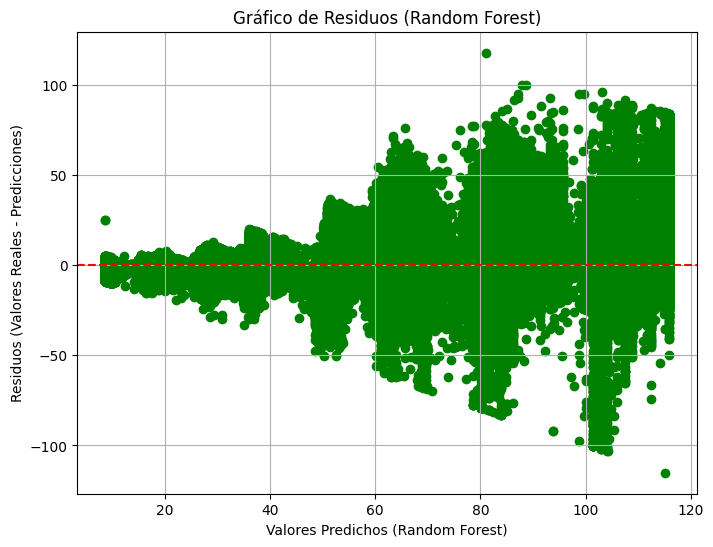

In [34]:
plt.figure(figsize=(8, 6))
residuals_rf = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals_rf, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos (Random Forest)')
plt.ylabel('Residuos (Valores Reales - Predicciones)')
plt.title('Gráfico de Residuos (Random Forest)')
plt.grid(True)
plt.show()

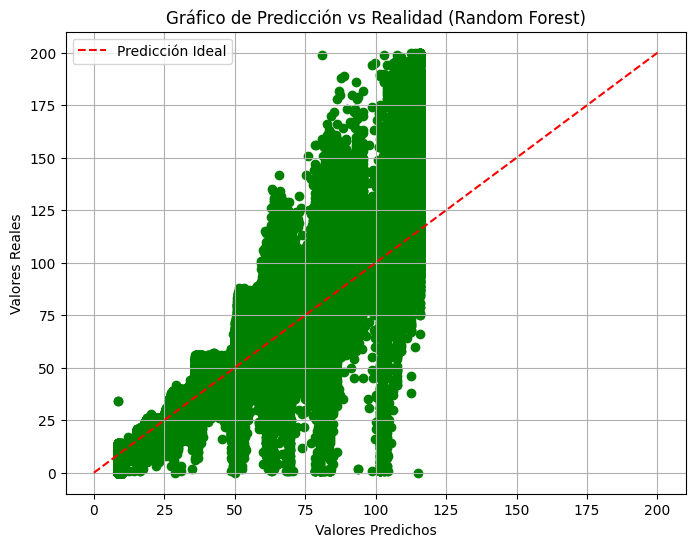

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, y_test, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Predicción Ideal')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales')
plt.title('Gráfico de Predicción vs Realidad (Random Forest)')
plt.grid(True)
plt.legend()
plt.show()